In [ ]:
import tensorflow as tf
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from Data_processing_functions import *


In [32]:
# Define Data Directory
dir_path = 'data'
color_dir = os.path.join(dir_path, 'train_color')
black_dir = os.path.join(dir_path, 'train_black')

# List all images
color_images_paths = glob.glob(os.path.join(color_dir, '*.jpg'))
black_images_paths = glob.glob(os.path.join(black_dir, '*.jpg'))

# Sort all images in case they are not aligned
color_images_paths.sort()
black_images_paths.sort()

color_images_paths[:5]

['data\\train_color\\image0000.jpg',
 'data\\train_color\\image0001.jpg',
 'data\\train_color\\image0002.jpg',
 'data\\train_color\\image0003.jpg',
 'data\\train_color\\image0004.jpg']

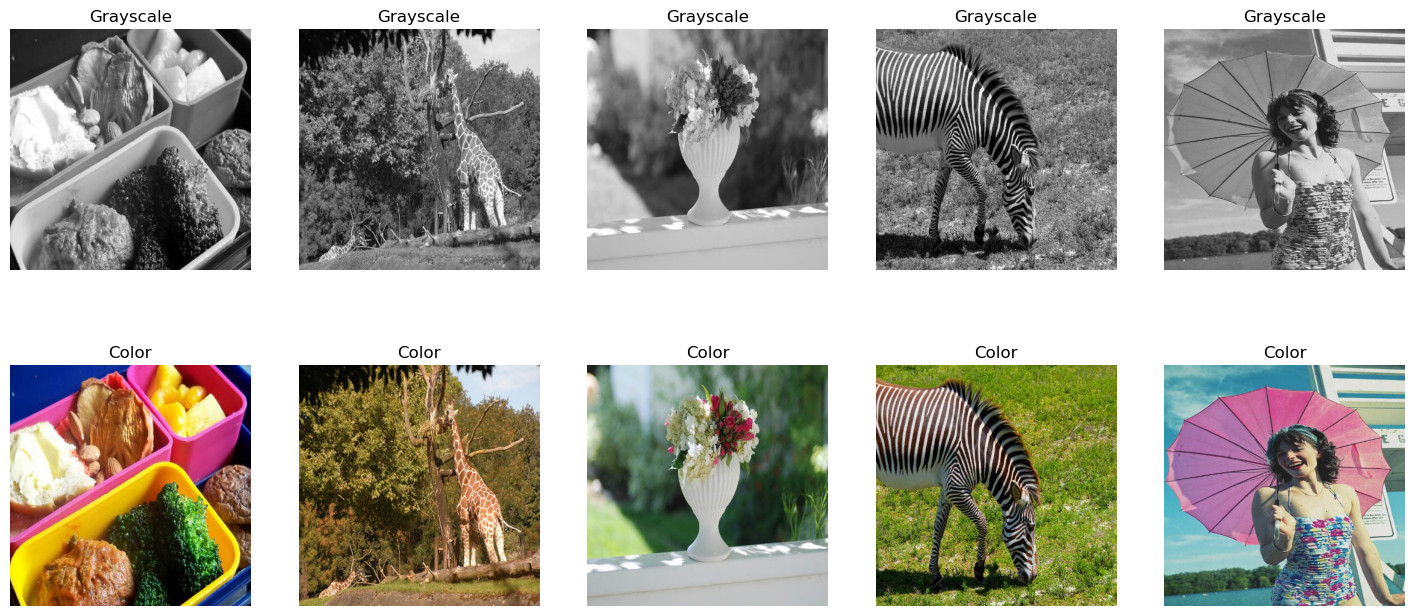

In [16]:
# Select first five images

num_images_to_display = 5

selected_colored_images = color_images_paths[:num_images_to_display]
selected_black_images = black_images_paths[:num_images_to_display]

# Loading images
color_images = [cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) for image_path in selected_colored_images]
gray_images = [cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) for image_path in selected_black_images]


def show_images(gray_images, color_images, num_images = 5):
    plt.figure(figsize = (18,8))

    for i in range(num_images):

        #display gray images
        plt.subplot(2, num_images, i+1)
        plt.imshow(gray_images[i], cmap = 'gray')
        plt.axis('off')
        plt.title('Grayscale')

        # Display color image
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(color_images[i])
        plt.axis('off')
        plt.title('Color')

    plt.show()

# #visualizing images
show_images(gray_images, color_images, num_images=num_images_to_display)

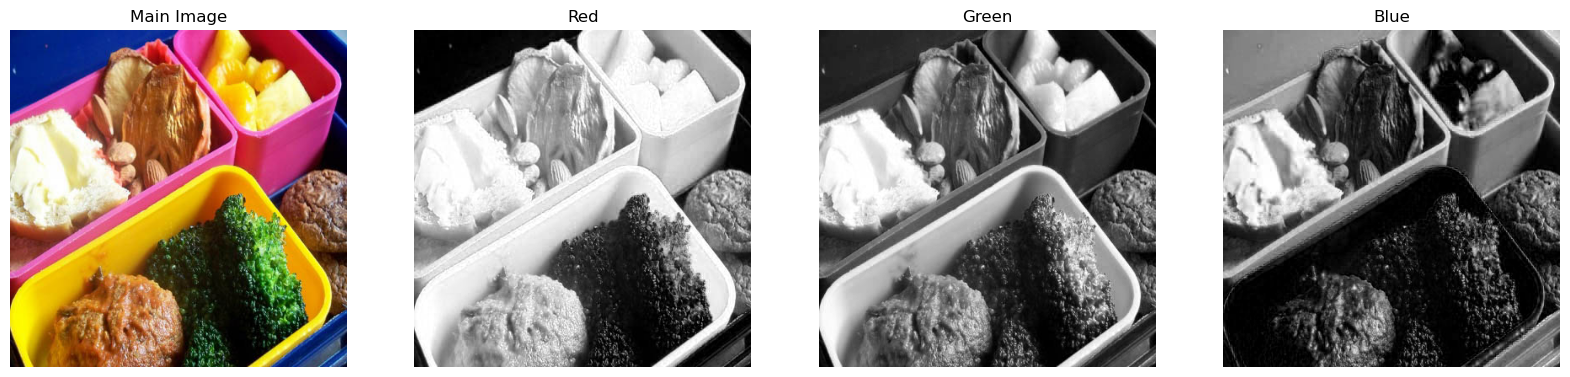

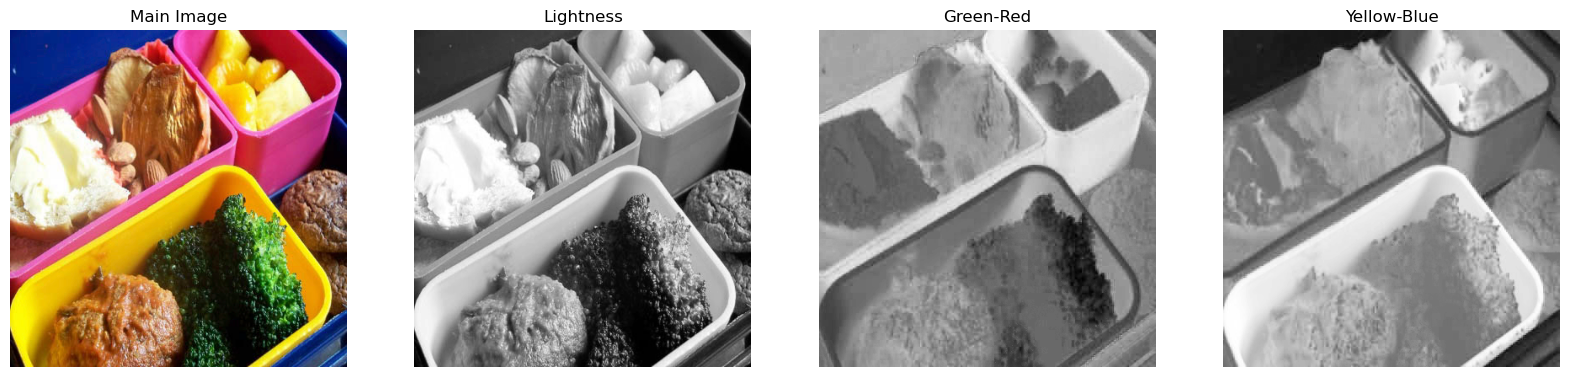

In [17]:
# Load the first color image
image_path = color_images_paths[0]
image = cv2.imread(image_path)


# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image from BGR to LAB
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the channels
r_channel, g_channel, b_channel = cv2.split(image_rgb)
l_channel, a_channel, b_channel_lab = cv2.split(image_lab)

# Function to display images
def display_images(main_image, channels, titles, space, is_rgb=True):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    if is_rgb:
        plt.imshow(main_image)
    else:
        plt.imshow(cv2.cvtColor(main_image, cv2.COLOR_LAB2RGB))
    plt.title('Main Image')
    plt.axis('off')

    for i, (channel, title) in enumerate(zip(channels, titles), start=2):
        plt.subplot(1, 4, i)
        plt.imshow(channel, cmap='gray')
        plt.title(title)
        plt.axis('off')

    plt.show()

# Titles for RGB and LAB channels
rgb_titles = ['Red', 'Green', 'Blue']
lab_titles = ['Lightness', 'Green-Red', 'Yellow-Blue']

# Display RGB channels
display_images(image_rgb, [r_channel, g_channel, b_channel], rgb_titles, 'Channel', is_rgb=True)

# Display LAB channels (L, A, B)
display_images(image_lab, [l_channel, a_channel, b_channel_lab], lab_titles, 'Channel', is_rgb=False)
